In [1]:
import numpy as np
import matplotlib.pyplot as plt

D:\MyPrograms\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


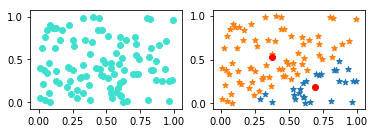

In [83]:
k = 2
np.random.seed(64)
X = np.random.rand(100,2)
kmeans(k, X, draw=True)


In [68]:
def kmeans(k, X, draw=False):
    centers = np.random.rand(k,2)
    for i in range(5):
        dist_x =  []
        for c in centers:
            d = np.asarray([np.sqrt(np.sum((elem-c)**2)) for elem in X])
            dist_x.append(d)

        dist_x = np.asarray(dist_x)
        indexes = np.argmin(dist_x, axis=0)
        
    for i in range(k):
        centers[i, :] = np.mean(X[indexes == i, :], axis=0)

    if draw:
        plt.subplot(2, 2, 1)
        plt.scatter(X[:, 0], X[:, 1], c='turquoise', marker='o')

        plt.subplot(2, 2, 2)
        plt.plot(centers[:, 0], centers[:, 1], 'ro')
        for i in range(k):
            plt.scatter(X[indexes == i, 0], X[indexes == i, 1], marker='*')
            